## 12_Plot_EDA

Author: Daniel Hui

License: MIT

This notebook is used for exploratory EDA with the entire dataset, including exploratory plots

In [1]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Global Variables

In [2]:
#target_range = "18_January"
target_range = "18_Half"

### Load Dataset

In [3]:
checkout_target_df = pd.read_csv(f'../01_Data/07_Merged_Target_Feature_Data/{target_range}_set.csv',index_col=0)

In [4]:
checkout_target_df.head(3)

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,30 Days,90 Days,180 Days,365 Days,Branches,Copies,bal,bea,bro,cap,cen,col,dlr,dth,fre,glk,gwd,hip,idc,lcy,mag,mgm,mon,net,nga,nhy,qna,rbe,spa,swt,uni,wal,wts
0,3177276,0,1,0,2016,0,0,1,0,0,0,0,0,0,0,0,14,45,78,94,17,18,0,1,1,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,1
1,395432,0,1,1,1985,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,123754,1,1,0,1945,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
checkout_target_df.describe()

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,30 Days,90 Days,180 Days,365 Days,Branches,Copies,bal,bea,bro,cap,cen,col,dlr,dth,fre,glk,gwd,hip,idc,lcy,mag,mgm,mon,net,nga,nhy,qna,rbe,spa,swt,uni,wal,wts
count,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000
mean,2234258.6919,0.4945,0.9982,0.8704,1983.6751,0.2787,0.0825,0.6330,0.0375,0.0212,0.0386,0.1546,0.0472,0.0240,0.0191,0.0320,0.7237,2.3485,4.8724,9.6092,2.4991,2.8845,0.1122,0.0724,0.0847,0.0708,0.8960,0.0652,0.0327,0.0950,0.0347,0.0525,0.1073,0.0404,0.0234,0.1006,0.0491,0.0200,0.0331,0.1286,0.0692,0.0249,0.0464,0.0653,0.0317,0.1011,0.0575,0.0150,0.0691
std,953967.6490,0.5000,0.0423,0.3359,189.6728,0.4484,0.2751,0.4820,0.1899,0.1439,0.1927,0.3616,0.2121,0.1531,0.1368,0.1760,5.1280,12.2969,20.5221,34.4055,3.0947,4.7797,0.3156,0.2591,0.2785,0.2565,0.3053,0.2469,0.1778,0.2933,0.1830,0.2231,0.3095,0.1970,0.1510,0.3008,0.2161,0.1401,0.1789,0.3348,0.2537,0.1560,0.2104,0.2471,0.1752,0.3015,0.2327,0.1214,0.2537
min,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1848333.5000,0.0000,1.0000,1.0000,1996.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,2554562.0000,0.0000,1.0000,1.0000,2007.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,2957797.5000,1.0000,1.0000,1.0000,2013.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,3.0000,7.0000,3.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,3343666.0000,1.0000,1.0000,1.0000,2022.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,585.0000,1436.0000,1613.0000,2621.0000,27.0000,290.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [6]:
len(checkout_target_df)

397147

### Plots

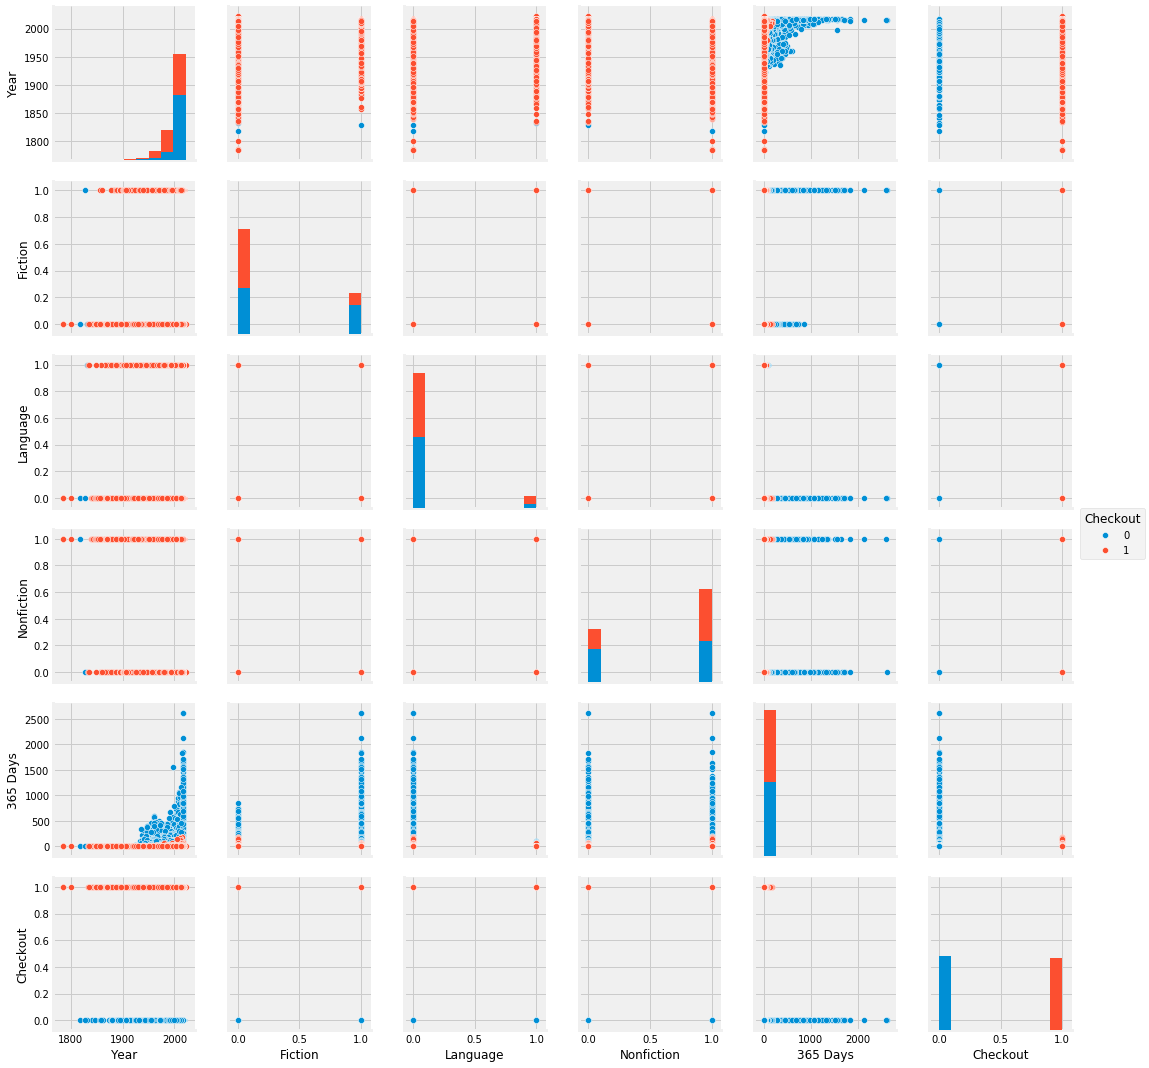

In [7]:
sns.pairplot(checkout_target_df[["Year","Fiction","Language","Nonfiction","365 Days","Checkout"]].dropna(), hue='Checkout')

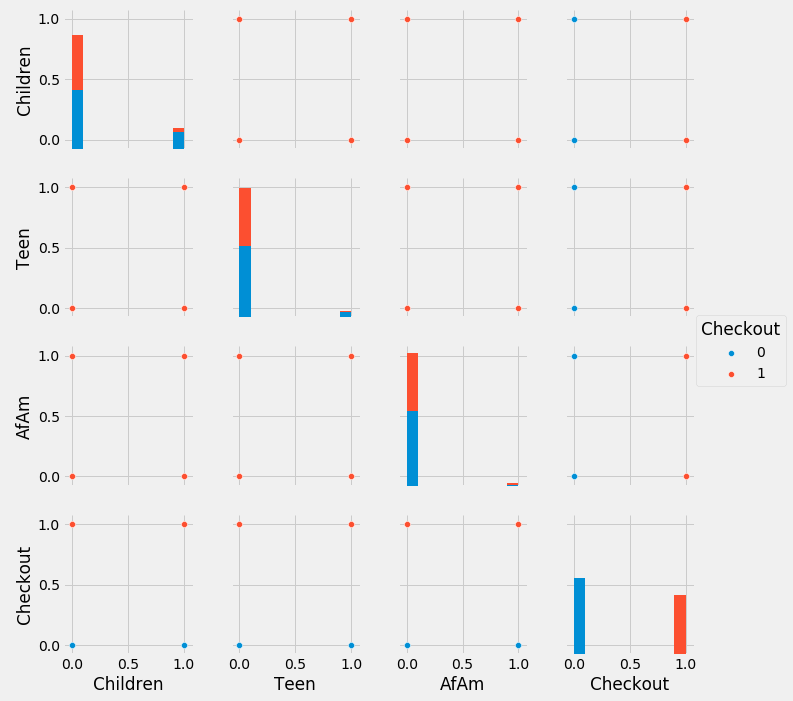

In [22]:
sns.pairplot(checkout_target_df[['Children', 'Teen', 'AfAm', "365 Days","Checkout"]].dropna(), hue='Checkout')

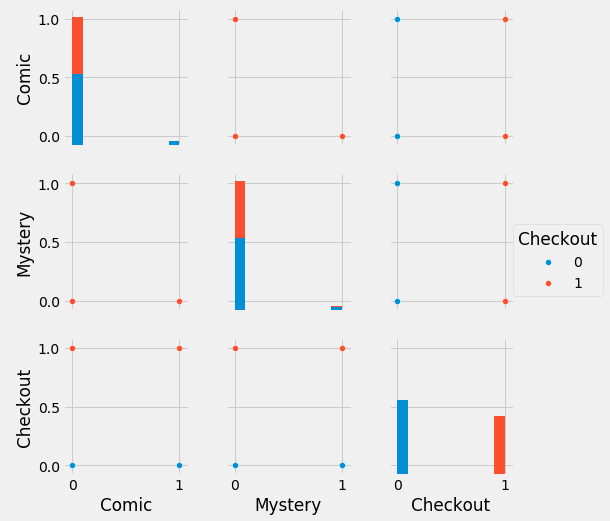

In [23]:
sns.pairplot(checkout_target_df[['Comic',"Mystery","Checkout"]].dropna(), hue='Checkout')

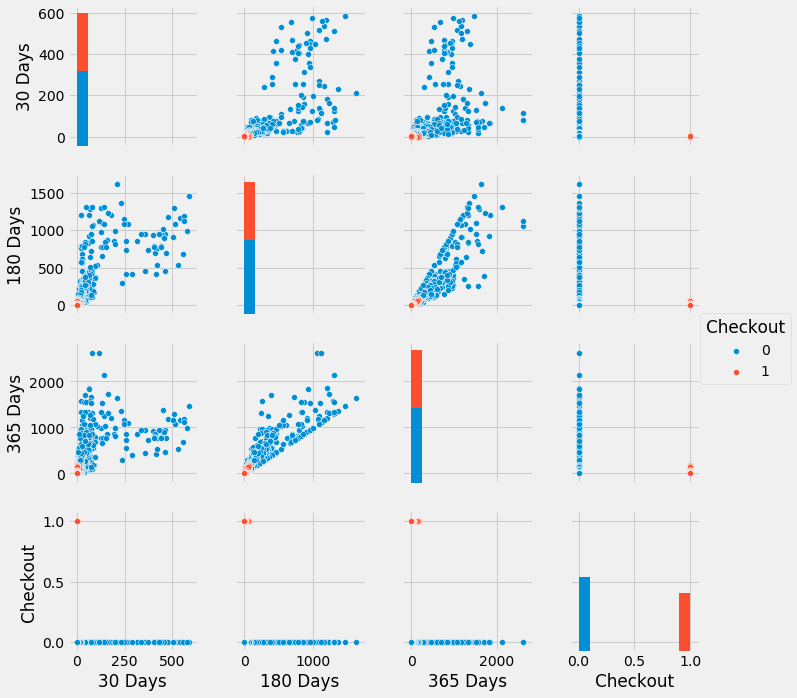

In [24]:
sns.pairplot(checkout_target_df[['30 Days', '180 Days','365 Days','Checkout']].dropna(), hue='Checkout')

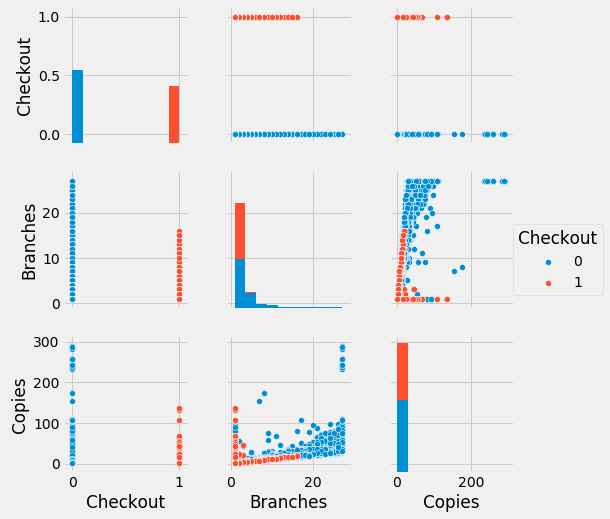

In [25]:
sns.pairplot(checkout_target_df[['Checkout', 'Branches','Copies']].dropna(), hue='Checkout')

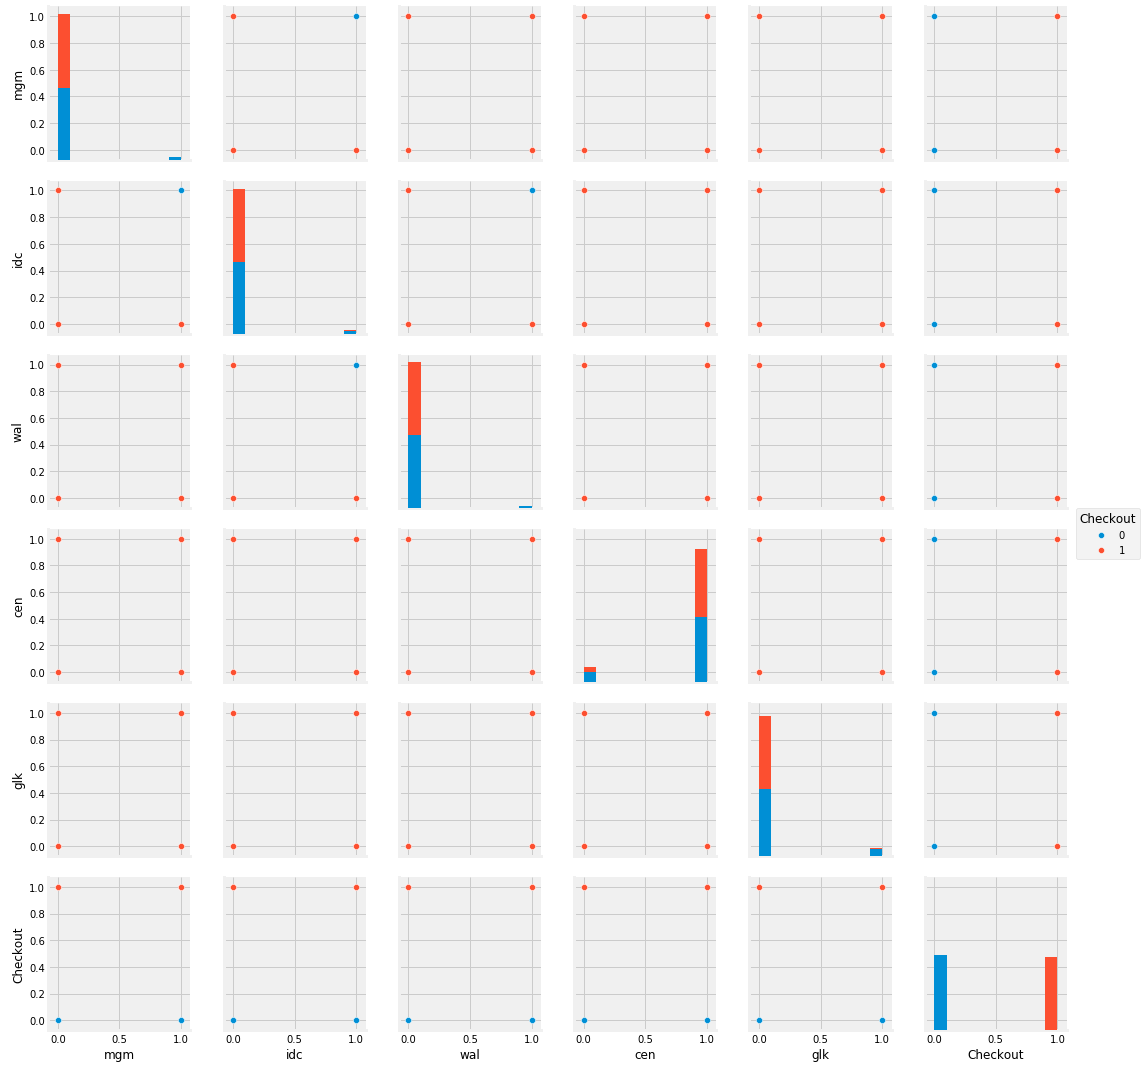

In [10]:
sns.pairplot(checkout_target_df[["mgm", "idc", "wal",'cen',"glk",'Checkout']].dropna(), hue='Checkout')